In [1]:
import numpy as np
import scipy.sparse as sp
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
import src

# Step 1: Community-based social network construction

In [2]:
distances_np = np.load('../data/laurelhurst_distance_matrix.npy')

"""Step 1: Community-based social network construction"""
# create a community
community = src.Community()
community.add_nodes_from(range(distances_np.shape[0]))

# generate social ties
np.random.seed(0)
degree_list = np.random.negative_binomial(0.78773808, 0.02559534, size=distances_np.shape[0])
degree_list = degree_list*1.0
degree_list = degree_list.astype(int)
community.generate_social_ties(degrees=degree_list, distance_matrix=distances_np, distance_decay_alpha=-1.35, seed=1)
community.split_social_ties(types=["strong", "weak"], pmf=[0.41296, 0.58704], seed=2)

"""Step 2: Community-based resource-sharing network construction"""
# generate sharing preferences
sharing_preferences = pd.read_csv('../temp/laurelhurst_share_pref_PMF.csv')['transp']
# sharing_preferences = [0.0, 0.0, 0.0, 1.0]
community.generate_sharing_preference(recipient=[0, 1, 2, 3], pmf=sharing_preferences, name='transp_share_preference', seed=3)

"""Step 3: Community-based resource distribution"""
resource_distribution = pd.read_csv('../temp/laurelhurst_resource_distr_PMF.csv')['transp']
community.generate_resource_inventory(support=np.arange(0, len(resource_distribution)), pmf=resource_distribution, name='transp', seed=4)

# create sharing network
share_network = community.get_share_network('transp_share_preference', priority=[3, 2, 1])

Social tie matrix:
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum of social tie matrix:
50198
Average number of social ties per household:
26.800854244527496


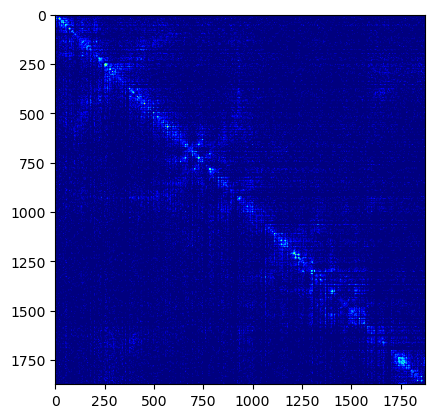

In [3]:
strong_tie_matrix = community.get_social_tie_matrix(type="strong")
weak_tie_matrix = community.get_social_tie_matrix(type="weak")
social_tie_matrix = strong_tie_matrix + weak_tie_matrix
stranger_tie_matrix = np.ones_like(social_tie_matrix) - social_tie_matrix

print("Social tie matrix:")
print(social_tie_matrix)
print("Sum of social tie matrix:")
print(np.sum(social_tie_matrix))
print("Average number of social ties per household:")
print(np.sum(social_tie_matrix)/social_tie_matrix.shape[0])
plt.imshow(social_tie_matrix, cmap='jet')
plt.show()

Strong tie matrix:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum of strong tie matrix:
10401.0
Weak tie matrix:
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum of weak tie matrix:
14698.0


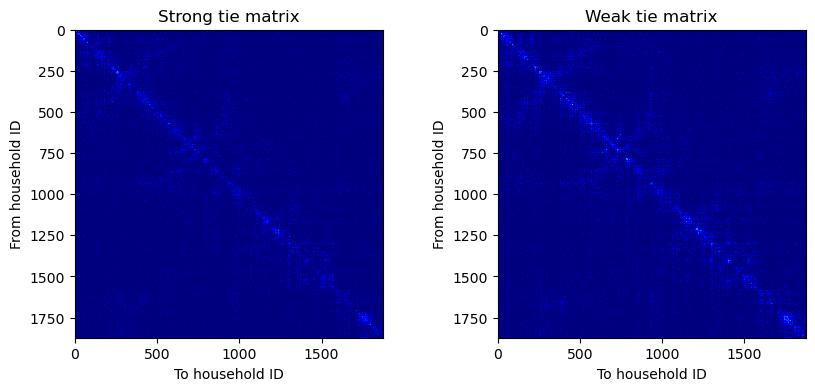

In [4]:
print("Strong tie matrix:")
print(strong_tie_matrix)
print("Sum of strong tie matrix:")
print(np.sum(strong_tie_matrix)/2)
print("Weak tie matrix:")
print(weak_tie_matrix)
print("Sum of weak tie matrix:")
print(np.sum(weak_tie_matrix)/2)

# plot the strong tie matrix and weak tie matrix
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(strong_tie_matrix, cmap='jet')
axs[0].set_xlabel('To household ID')
axs[0].set_ylabel('From household ID')
axs[0].set_title('Strong tie matrix')
axs[1].imshow(weak_tie_matrix, cmap='jet')
axs[1].set_xlabel('To household ID')
axs[1].set_ylabel('From household ID')
axs[1].set_title('Weak tie matrix')
plt.show()

Stranger tie matrix:
[[1 0 0 ... 1 1 1]
 [0 1 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
Sum of stranger tie matrix:
3457931


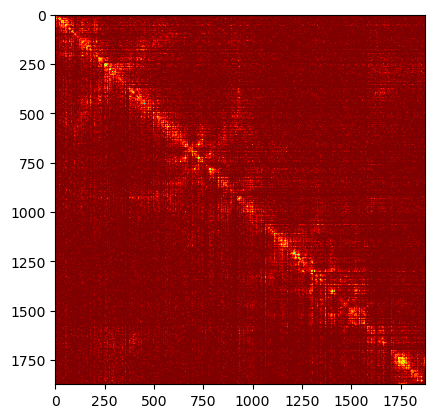

In [5]:
print("Stranger tie matrix:")
print(stranger_tie_matrix)
print("Sum of stranger tie matrix:")
print(np.sum(stranger_tie_matrix))
plt.imshow(stranger_tie_matrix, cmap='jet')
plt.show()

## Area2Area social ties

In [6]:
households_df = pd.read_csv('../data/laurelhurst_address.csv')
households_df

,ID,CLUSTER,PIN,TAXPAYER NAME,ADDRESS,CITY,ZIP,passcode,latitude,longitude,area
0,0,1,4.217402e+09,GOULD STEVEN D,3057 E LAURELHURST DR NE,SEATTLE,98105,NaN,47.650179,-122.276723,G
1,1,1,4.217402e+09,MAHER T DEAN,3049 E LAURELHURST DR NE,SEATTLE,98105,NaN,47.650001,-122.276670,G
2,2,1,4.217402e+09,ATTERBURY CHARLES AND SHERR,3045 E LAURELHURST DR NE,SEATTLE,98105,NaN,47.649887,-122.276535,G
3,3,1,4.217402e+09,QUIGLEY TERENCE M+TRACY Q,3033 E LAURELHURST DR NE,SEATTLE,98105,NaN,47.649761,-122.276304,G
4,4,1,4.217402e+09,MCCOY KATHLEEN ET AL,3023 E LAURELHURST DR NE,SEATTLE,98105,NaN,47.649416,-122.276332,G
...,...,...,...,...,...,...,...,...,...,...,...
1868,1868,95,NaN,NaN,3923 NE 45TH ST APT 210,SEATTLE,98105,37047.0,47.660853,-122.285765,C
1869,1869,95,NaN,NaN,3923 NE 45TH ST APT 310,SEATTLE,98105,37051.0,47.660853,-122.285765,C
1870,1870,95,NaN,NaN,3901 NE 45TH ST APT 303,SEATTLE,98105,37055.0,47.660995,-122.285688,C
1871,1871,95,NaN,NaN,3901 NE 45TH ST APT 403,SEATTLE,98105,37059.0,47.660995,-122.285688,C


In [7]:
household_areas = households_df['area']
num_households = np.array([
    household_areas.value_counts()['A'],
    household_areas.value_counts()['B'],
    household_areas.value_counts()['C'],
    household_areas.value_counts()['D'],
    household_areas.value_counts()['E'],
    household_areas.value_counts()['F'],
    household_areas.value_counts()['G']
])

# Define a dictionary to map area letters to indices
area_indices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# Initialize a 7x7 matrix with zeros
strong_tie_area_matrix = np.zeros((7, 7))
weak_tie_area_matrix = np.zeros((7, 7))

# Loop through the social tie matrix
for i in range(np.shape(social_tie_matrix)[0]):
    for j in range(np.shape(social_tie_matrix)[1]):
        if social_tie_matrix[i, j] == 1:
            # Determine the area of the household
            area_i = household_areas[i]
            area_j = household_areas[j]

            # Determine the row index based on the area
            row = area_indices[area_i]
            col = area_indices[area_j]

            # Add 1 to the strong tie matrix if the strong tie matrix has 1
            if strong_tie_matrix[i, j] == 1:
                strong_tie_area_matrix[row, col] += 1
            # Add 1 to the weak tie matrix if the weak tie matrix has 1
            elif weak_tie_matrix[i, j] == 1:
                weak_tie_area_matrix[row, col] += 1

# count the number of household in each area
households_df['area'].value_counts()

print("Area average strong tie matrix:")
display(np.round(strong_tie_area_matrix/num_households, decimals=2))
print("Area average weak tie matrix:")
display(np.round(weak_tie_area_matrix/num_households, decimals=2))
print("Area average social tie matrix:")
display(np.round((strong_tie_area_matrix + weak_tie_area_matrix)/num_households, decimals=2))
print("Total number of ties:")
print(np.sum(strong_tie_area_matrix + weak_tie_area_matrix))
print("Average number of ties per household:")
print(np.sum(strong_tie_area_matrix + weak_tie_area_matrix)/np.sum(num_households))

Area average strong tie matrix:


array([[5.67, 1.92, 0.84, 0.84, 1.31, 0.77, 0.76],
       [1.43, 3.43, 0.66, 1.01, 1.56, 1.24, 0.9 ],
       [0.36, 0.38, 4.94, 0.94, 0.29, 0.38, 0.47],
       [0.73, 1.18, 1.91, 5.35, 0.75, 1.84, 2.18],
       [0.89, 1.42, 0.46, 0.59, 4.44, 1.58, 0.85],
       [0.52, 1.12, 0.6 , 1.43, 1.57, 4.36, 2.05],
       [0.46, 0.74, 0.68, 1.54, 0.76, 1.86, 6.06]])

Area average weak tie matrix:


array([[8.22, 2.74, 1.16, 1.13, 1.75, 1.2 , 0.95],
       [2.04, 5.12, 1.14, 1.39, 2.3 , 1.75, 1.31],
       [0.49, 0.65, 6.8 , 1.34, 0.4 , 0.5 , 0.66],
       [0.97, 1.61, 2.72, 7.31, 1.13, 2.54, 2.69],
       [1.19, 2.09, 0.64, 0.89, 6.8 , 2.23, 1.19],
       [0.81, 1.58, 0.79, 1.98, 2.21, 6.51, 3.04],
       [0.58, 1.07, 0.94, 1.9 , 1.07, 2.76, 7.92]])

Area average social tie matrix:


array([[13.89,  4.66,  2.  ,  1.97,  3.06,  1.97,  1.71],
       [ 3.47,  8.55,  1.8 ,  2.4 ,  3.85,  3.  ,  2.21],
       [ 0.85,  1.03, 11.74,  2.29,  0.69,  0.88,  1.13],
       [ 1.7 ,  2.79,  4.63, 12.65,  1.89,  4.38,  4.87],
       [ 2.07,  3.51,  1.1 ,  1.48, 11.24,  3.81,  2.03],
       [ 1.33,  2.71,  1.39,  3.41,  3.78, 10.87,  5.09],
       [ 1.04,  1.81,  1.61,  3.44,  1.83,  4.62, 13.98]])

Total number of ties:
50198.0
Average number of ties per household:
26.800854244527496


In [9]:
# the proportion of strong ties to total ties
np.round(strong_tie_area_matrix / (strong_tie_area_matrix + weak_tie_area_matrix), decimals=2)

array([[0.41, 0.41, 0.42, 0.43, 0.43, 0.39, 0.44],
       [0.41, 0.4 , 0.37, 0.42, 0.4 , 0.41, 0.41],
       [0.42, 0.37, 0.42, 0.41, 0.42, 0.43, 0.42],
       [0.43, 0.42, 0.41, 0.42, 0.4 , 0.42, 0.45],
       [0.43, 0.4 , 0.42, 0.4 , 0.39, 0.41, 0.42],
       [0.39, 0.41, 0.43, 0.42, 0.41, 0.4 , 0.4 ],
       [0.44, 0.41, 0.42, 0.45, 0.42, 0.4 , 0.43]])

In [35]:
# A prediction of the number of ties in the social network
1873/246*7377.0

56167.15853658537

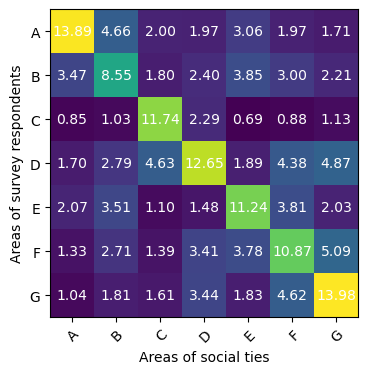

In [36]:
# create data
data = (strong_tie_area_matrix + weak_tie_area_matrix)/num_households

# create figure and axes
fig, ax = plt.subplots(figsize=(4, 4))

# plot data as grid
im = ax.imshow(data, cmap='viridis')

# add colorbar
# cbar = ax.figure.colorbar(im, ax=ax)

# set axis labels
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(np.arange(data.shape[1])+1)
ax.set_yticklabels(np.arange(data.shape[0])+1)

# set axis tick labels to be readable
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add title
# ax.set_title("2D Grid Plot")
ax.set_xlabel('Areas of social ties')
ax.set_ylabel('Areas of survey respondents')
# set x-ticklabels as A, B, C, D, E, F, G
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
# set y-ticklabels as A, B, C, D, E, F, G
ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# add text annotations for each cell
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.2f}', ha="center", va="center", color="w")

# save plot
plt.savefig('../figs/Laurelhurst_gener_social_tie.png', dpi=300, bbox_inches='tight')

## Plot the social network

In [37]:
import geopandas as gpd
import networkx as nx
import contextily as cx

d:\Software\Anaconda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


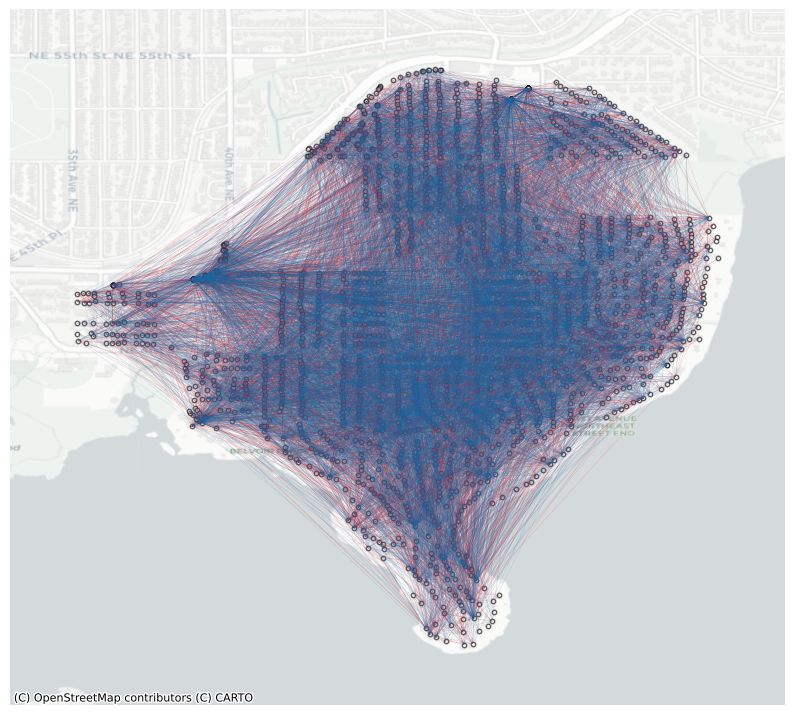

In [38]:
node_list = households_df['ID'].tolist()
node_pos = households_df[['longitude', 'latitude']].values
strong_ties = np.argwhere(strong_tie_matrix == 1).tolist()
weak_ties = np.argwhere(weak_tie_matrix == 1).tolist()
edge_list = strong_ties + weak_ties

# Create a GeoDataFrame from the households DataFrame
geometry = gpd.points_from_xy(node_pos[:,0], node_pos[:,1])
gdf = gpd.GeoDataFrame(households_df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}

# Create a NetworkX graph from the edge list
G = nx.Graph()
G.add_nodes_from(gdf['ID'])
G.add_edges_from(edge_list)

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame nodes
gdf.plot(ax=ax, markersize=10, color='white', alpha=0.6, edgecolor='black')

# Plot the NetworkX edges
nx.draw_networkx_edges(
    G,
    pos=node_pos,
    edgelist=strong_ties,
    width=0.1,
    alpha=0.3,
    edge_color="red",
    label="Strong ties"
)

nx.draw_networkx_edges(
    G,
    pos=node_pos,
    edgelist=weak_ties,
    width=0.1,
    alpha=0.3,
    edge_color="tab:blue",
    label="Weak ties"
)

# add base map
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

plt.axis('off')
plt.show()

# save the figure
fig.savefig('../figs/laurelhurst_social_tie_net.png', dpi=300, bbox_inches='tight', transparent=True)

# Step 2: Community-based P2P resource-sharing network construction

In [39]:
# show the number of nodes and edges
print("# of nodes = ", len(share_network.nodes))
print("# of links = ", len(share_network.edges))

# number of links corresponding to strong ties
num_strong_links = 0
for e in share_network.edges:
    if share_network.edges[e]['weight'] == 3:
        num_strong_links += 1
num_weak_links = 0
for e in share_network.edges:
    if share_network.edges[e]['weight'] == 2:
        num_weak_links += 1
num_stranger_links = len(share_network.edges) - num_strong_links - num_weak_links

# print("# of strong links = ", num_strong_links, "percentage = ", num_strong_links/len(share_network.edges))
# print("# of weak links = ", num_weak_links, "percentage = ", num_weak_links/len(share_network.edges))
# print("# of stranger links = ", num_stranger_links, "percentage = ", num_stranger_links/len(share_network.edges))

# of nodes =  1873
# of links =  1248342


# Step 3: Community-based resource distribution with inventory

d:\Software\Anaconda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LI Zhengyang\AppData\Local\Temp\ipykernel_24268\3810255779.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('copper')  # Choose a colormap


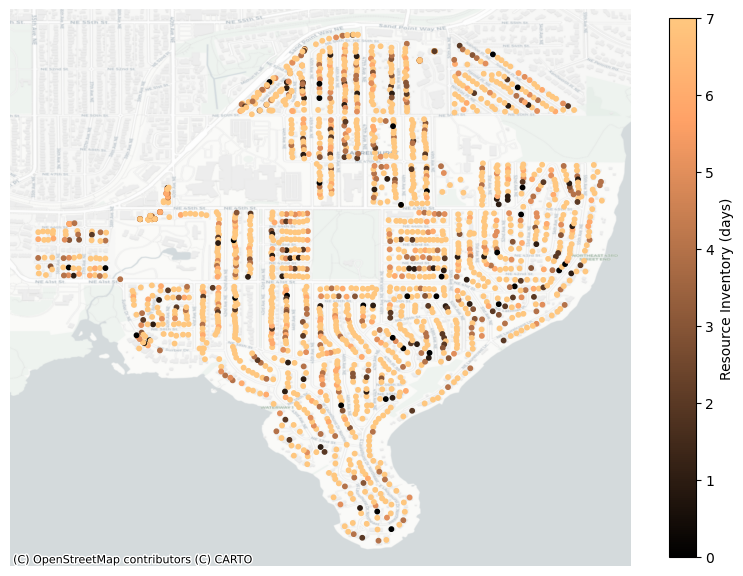

In [40]:
node_list = households_df['ID'].tolist()
node_pos = households_df[['longitude', 'latitude']].values

geometry = gpd.points_from_xy(node_pos[:,0], node_pos[:,1])
gdf = gpd.GeoDataFrame(households_df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10, 10))

# set the node color to be proportional to the resource inventory
resource_inventory = [community.nodes[n]['transp'] for n in node_list]
cmap = plt.cm.get_cmap('copper')  # Choose a colormap
node_color = resource_inventory / max(resource_inventory)
node_color_mapped = cmap(node_color)

# Plot the GeoDataFrame
gdf.plot(ax=ax, markersize=10, color=node_color_mapped, alpha=1)

# add base map
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(resource_inventory)
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Resource Inventory (days)')

plt.axis('off')
plt.show()

# save the figure
fig.savefig("../figs/laurelhurst_transp_resource_inventory.png", dpi=300, bbox_inches='tight')

# Step 4: Community-based P2P resource-sharing model

In [41]:
priority_matrix = community.get_share_priority_matrix(sharing_preference='transp_share_preference', priority=[3, 2, 1])
resource_inventory = [community.nodes[n]['transp'] for n in node_list]
model = src.ResourceSharingModel(priority_matrix, resource_inventory, isolation_days=6)
model.solve()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3746 rows, 3508129 columns and 7016258 nonzeros
Model fingerprint: 0xa84f6fd4
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 2284 rows and 3295043 columns
Presolve time: 1.48s
Presolved: 1462 rows, 213086 columns, 426105 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.130e+05
 Factor NZ  : 3.882e+05 (roughly 90 MB of memory)
 Factor Ops : 1.997e+08 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual 

C:\Users\LI Zhengyang\AppData\Local\Temp\ipykernel_24268\275781425.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('copper')  # Choose a colormap


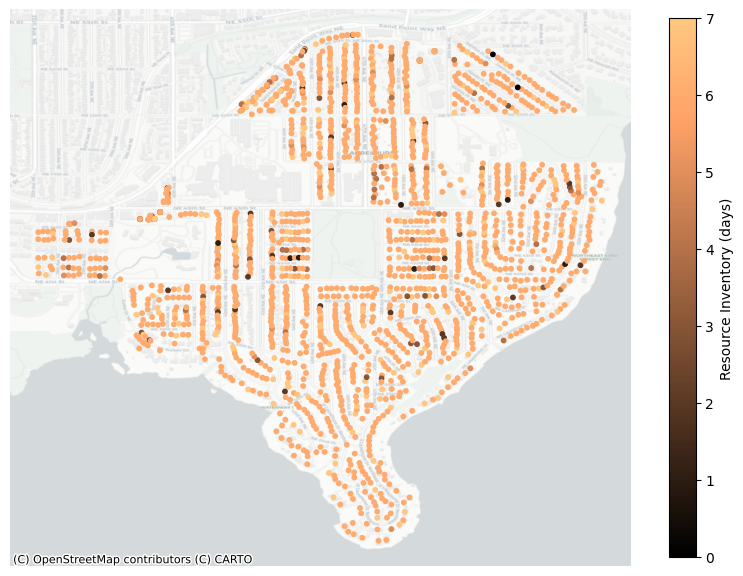

In [42]:
# plot the final resource inventory
fig, ax = plt.subplots(figsize=(10, 10))

# set the node color to be proportional to the resource inventory
resource_inventory = model.resource
cmap = plt.cm.get_cmap('copper')  # Choose a colormap
node_color = resource_inventory / max(resource_inventory)
node_color_mapped = cmap(node_color)

# Plot the GeoDataFrame
gdf.plot(ax=ax, markersize=10, color=node_color_mapped, alpha=1)

# add base map
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=7))
sm.set_array(resource_inventory)
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Resource Inventory (days)')

plt.axis('off')
plt.show()

fig.savefig("../figs/laurelhurst_transp_resource_redistribution.png", dpi=300, bbox_inches='tight')

# Step 5: Community-resilience analysis

ValueError: x and y must have same first dimension, but have shapes (601,) and (1, 601)

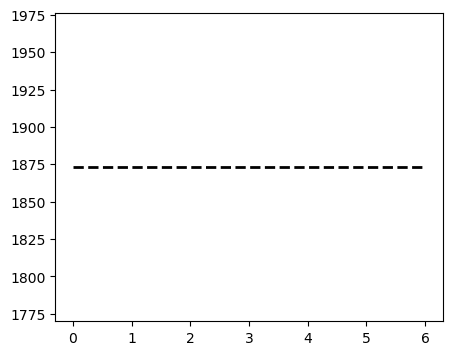

In [43]:
time_stamps = np.arange(0, 6.01, 0.01)
num_households = len(community.nodes)
survival_curve_normal = num_households*np.ones_like(time_stamps)
survival_curve_with_sharing = src.get_survival_curve(model.resource, time_stamps=time_stamps)
survival_curve_without_sharing = src.get_survival_curve(model.inventory, time_stamps=time_stamps)

# print the survival curve of the all scenarios
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plt.plot(time_stamps, survival_curve_normal, color='k', linestyle='dashed', linewidth=2, label='Normal state')
plt.plot(time_stamps, survival_curve_with_sharing, color='r', linestyle='-', linewidth=2, label='with P2P resoruce sharing')
plt.plot(time_stamps, survival_curve_without_sharing, color='b', linestyle='-', linewidth=2, label='Without P2P resource sharing')
plt.fill_between(time_stamps, survival_curve_with_sharing, survival_curve_normal, color='r', alpha=0.2)
# plt.fill_between(time_stamps[600:], survival_curve_with_sharing[600:], survival_curve_without_sharing[600:], color='r', alpha=0.2)
# plt.fill_between(time_stamps, survival_curve_without_sharing, color='b', alpha=0.2)
plt.fill_between(time_stamps, survival_curve_without_sharing, survival_curve_with_sharing, color='b', alpha=0.2)
plt.xlabel('Time (day)')
plt.ylabel('Average number of survival households')
plt.xlim(0, 6)
# plt.ylim(1200, 1900)
plt.legend()
plt.savefig('../figs/laurelhurst_survival_curve.png', dpi=300, bbox_inches='tight')

In [ ]:
print("min survival households with sharing:", min(survival_curve_with_sharing))
print("min survival households without sharing:", min(survival_curve_without_sharing))
print("min survival rate with sharing:", min(survival_curve_with_sharing)/len(node_list))
print("min survival rate without sharing:", min(survival_curve_without_sharing)/len(node_list))

min survival households with sharing: 1733.0
min survival households without sharing: 1382.0
min survival rate with sharing: 0.9252536038441004
min survival rate without sharing: 0.7378537106246663


In [ ]:
# with sharing
print("RE:", src.get_resilience(x=time_stamps, y=survival_curve_with_sharing))
print("RL:", src.get_resilience_loss(x=time_stamps, y=survival_curve_with_sharing))

RE: 10878.7
RL: 359.2999999999993


In [ ]:
# without sharing
print("RE:", src.get_resilience(x=time_stamps, y=survival_curve_without_sharing))
print("RL:", src.get_resilience_loss(x=time_stamps, y=survival_curve_without_sharing))

RE: 9848.455
RL: 1389.545


In [ ]:
# resilience improvement
(src.get_resilience(x=time_stamps, y=survival_curve_with_sharing) - src.get_resilience(x=time_stamps, y=survival_curve_without_sharing))/src.get_resilience(x=time_stamps, y=survival_curve_without_sharing)

0.10460980935588382